In [2]:
%pip install spotipy
%pip install pandas
%pip install streamlit
%pip install plotly
%pip install matplotlib
%pip install scikit-learn

  Using cached spotipy-2.23.0-py3-none-any.whl (29 kB)
  Using cached urllib3-2.0.3-py3-none-any.whl (123 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached redis-4.6.0-py3-none-any.whl (241 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached certifi-2023.5.7-py3-none-any.whl (156 kB)
  Using cached charset_normalizer-3.2.0-cp38-cp38-macosx_10_9_x86_64.whl (124 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
You should consider upgrading via the '/Users/sameehaafr/Code/KNN_MUSIC_FINAL/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
  Using cached pandas-2.0.3-cp38-cp38-macosx_10_9_x86_64.whl (11.7 MB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached numpy-1.24.4-cp38-cp38-macosx_10_9_x86_64.whl (19.8 MB)
You should consider upgrading via the '/Users/sameehaafr/Code/KNN_MUSIC_FIN

In [21]:
%pip install --upgrade nbformat

  Using cached nbformat-5.9.1-py3-none-any.whl (77 kB)
  Using cached fastjsonschema-2.17.1-py3-none-any.whl (23 kB)
  Using cached traitlets-5.9.0-py3-none-any.whl (117 kB)
  Using cached jupyter_core-5.3.1-py3-none-any.whl (93 kB)
  Using cached jsonschema-4.18.0-py3-none-any.whl (81 kB)
  Using cached platformdirs-3.8.1-py3-none-any.whl (16 kB)
  Using cached rpds_py-0.8.10-cp38-cp38-macosx_10_7_x86_64.whl (311 kB)
  Using cached jsonschema_specifications-2023.6.1-py3-none-any.whl (17 kB)
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
  Using cached referencing-0.29.1-py3-none-any.whl (25 kB)
  Using cached pkgutil_resolve_name-1.3.10-py3-none-any.whl (4.7 kB)
  Using cached importlib_resources-6.0.0-py3-none-any.whl (31 kB)
  Using cached zipp-3.16.0-py3-none-any.whl (6.7 kB)
You should consider upgrading via the '/Users/sameehaafr/Code/KNN_MUSIC_FINAL/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import spotipy
import warnings
import pandas as pd
import streamlit as st
import plotly.express as px 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from spotipy.oauth2 import SpotifyClientCredentials

warnings.filterwarnings("ignore")

In [5]:
CLIENT_ID = "3e28cbdec0e841c08ec2d6b9b949cef1"
CLIENT_SECRET = "857ea858725348e09cbeb6f1470bcbac"

COLS = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'tempo', 'valence']


POP1 = '37i9dQZF1DXcBWIGoYBM5M'
HH1 = '37i9dQZF1DX0XUsuxWHRQd'
COUNTRY1 = '37i9dQZF1DX1lVhptIYRda'
LATIN1 = '37i9dQZF1DX10zKzsJ2jva'
ROCK1 = '37i9dQZF1DXcF6B6QPhFDv'
EDM1 = '37i9dQZF1DX4dyzvuaRJ0n'
INDIE1 = '37i9dQZF1DXdwmD5Q7Gxah'
RB1 = '37i9dQZF1DX4SBhb3fqCJd'
JAZZ1 = '37i9dQZF1DX7YCknf2jT6s'
METAL1 = '37i9dQZF1DWXNFSTtym834'
playlist_arr = [POP1, HH1, COUNTRY1, LATIN1, ROCK1, EDM1, INDIE1, RB1, JAZZ1, METAL1]
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [17]:
data = []

for playlist_uri in playlist_arr:
    #playlist_id = playlist_uri.split(':')[-1]
    playlist = sp.playlist(playlist_uri)
    tracks = playlist['tracks']['items']

    for track in tracks:
        track_info = track['track']
        track_name = track_info['name']
        artist_name = track_info['artists'][0]['name']
        audio_features = sp.audio_features(track_info['id'])[0]
        genres = sp.artist(track_info['artists'][0]['id'])['genres']

        if audio_features is not None and genres is not None:
            audio_data = {
                'track_name': track_name,
                'artist_name': artist_name,
                'genres': genres
            }
            audio_data.update(audio_features)
            data.append(audio_data)
playlist_df = pd.DataFrame(data)
playlist_df = playlist_df.drop(['key', 'mode', 'liveness', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis=1)
playlist_df

KeyboardInterrupt: 

In [5]:
playlist_df.to_csv('playlist_df.csv')

In [14]:
playlist_df = pd.read_csv('playlist_df.csv', index_col=0)

In [15]:
playlist_df

,track_name,artist_name,genres,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
0,Cruel Summer,Taylor Swift,['pop'],0.552,0.702,-5.707,0.1570,0.117000,0.000021,0.564,169.994
1,vampire,Olivia Rodrigo,['pop'],0.511,0.532,-5.745,0.0560,0.169000,0.000000,0.322,137.827
2,Popular (with Playboi Carti & Madonna) - Music...,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",0.855,0.678,-6.276,0.1890,0.056900,0.000037,0.852,99.029
3,Dance The Night (From Barbie The Album),Dua Lipa,"['dance pop', 'pop', 'uk pop']",0.671,0.845,-4.930,0.0480,0.020700,0.000000,0.775,110.056
4,WHERE SHE GOES,Bad Bunny,"['reggaeton', 'trap latino', 'urbano latino']",0.652,0.800,-4.019,0.0614,0.143000,0.629000,0.234,143.978
...,...,...,...,...,...,...,...,...,...,...,...
670,The art of dying,Gojira,"['alternative metal', 'french death metal', 'f...",0.493,0.830,-5.983,0.1050,0.000308,0.543000,0.114,137.967
671,Inis Mona,Eluveitie,"['bow pop', 'celtic metal', 'folk metal', 'got...",0.430,0.991,-2.837,0.0916,0.000343,0.002490,0.276,107.031
672,Ich tu dir weh,Rammstein,"['german metal', 'industrial', 'industrial met...",0.295,0.878,-5.034,0.0541,0.001120,0.191000,0.295,165.083
673,Right Side Of The Bed,Atreyu,"['alternative metal', 'melodic metalcore', 'me...",0.253,0.924,-4.830,0.1620,0.001790,0.008560,0.720,171.971


In [16]:
X = playlist_df[COLS]
y = playlist_df['genres']

Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

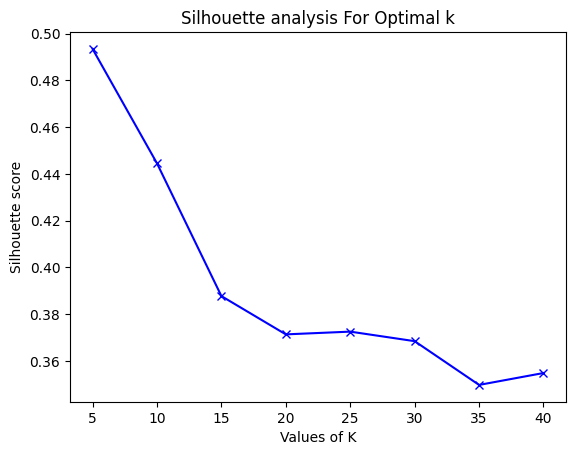

In [7]:
range_n_clusters = [5, 10, 15, 20, 25, 30, 35, 40]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_

    silhouette_avg.append(silhouette_score(X, cluster_labels))

fig = plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')

In [19]:
kmeans = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
kmeans.fit(X)
playlist_df['cluster'] = kmeans.predict(X)
playlist_df['genres'] = playlist_df['genres']

In [20]:
playlist_df

,track_name,artist_name,genres,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,cluster
0,Cruel Summer,Taylor Swift,['pop'],0.552,0.702,-5.707,0.1570,0.117000,0.000021,0.564,169.994,3
1,vampire,Olivia Rodrigo,['pop'],0.511,0.532,-5.745,0.0560,0.169000,0.000000,0.322,137.827,0
2,Popular (with Playboi Carti & Madonna) - Music...,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",0.855,0.678,-6.276,0.1890,0.056900,0.000037,0.852,99.029,7
3,Dance The Night (From Barbie The Album),Dua Lipa,"['dance pop', 'pop', 'uk pop']",0.671,0.845,-4.930,0.0480,0.020700,0.000000,0.775,110.056,7
4,WHERE SHE GOES,Bad Bunny,"['reggaeton', 'trap latino', 'urbano latino']",0.652,0.800,-4.019,0.0614,0.143000,0.629000,0.234,143.978,9
...,...,...,...,...,...,...,...,...,...,...,...,...
670,The art of dying,Gojira,"['alternative metal', 'french death metal', 'f...",0.493,0.830,-5.983,0.1050,0.000308,0.543000,0.114,137.967,9
671,Inis Mona,Eluveitie,"['bow pop', 'celtic metal', 'folk metal', 'got...",0.430,0.991,-2.837,0.0916,0.000343,0.002490,0.276,107.031,6
672,Ich tu dir weh,Rammstein,"['german metal', 'industrial', 'industrial met...",0.295,0.878,-5.034,0.0541,0.001120,0.191000,0.295,165.083,3
673,Right Side Of The Bed,Atreyu,"['alternative metal', 'melodic metalcore', 'me...",0.253,0.924,-4.830,0.1620,0.001790,0.008560,0.720,171.971,3


In [21]:
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = playlist_df['genres']
projection['cluster'] = playlist_df['cluster']

fig = px.scatter(projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 675 samples in 0.001s...
[t-SNE] Computed neighbors for 675 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 675 / 675
[t-SNE] Mean sigma: 0.847400
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.894268
[t-SNE] KL divergence after 1000 iterations: 0.885136


In [22]:
def get_audio_features(song_name, artist):
    query = f"track:{song_name} artist:{artist}"
    results = sp.search(q=query, type='track', limit=1)

    if len(results['tracks']['items']) > 0:
        track_id = results['tracks']['items'][0]['id']
        track_features = sp.audio_features([track_id])
        
        if len(track_features) > 0:
            track_info = sp.track(track_id)
            popularity = track_info['popularity']
            
            numerical_features = {key: value for key, value in track_features[0].items() if isinstance(value, (int, float))}
            numerical_features['popularity'] = popularity
            return numerical_features
    return None

In [23]:
audio_feats = get_audio_features('Dynamite', 'BTS')

In [24]:
def knn(k, X, y, audio_feats):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)

    num_feat = pd.DataFrame.from_dict(audio_feats, orient='index').T
    num_feat = num_feat[COLS]

    new_input_scaled = scaler.transform(num_feat.values.reshape(1, -1))

    distances, indices = knn.kneighbors(new_input_scaled)
    
    nearest_songs = playlist_df.iloc[indices[0]]

    print("Nearest Songs:")
    print(playlist_df['track_name'], playlist_df['artist_name'])
    return nearest_songs['genres'],  playlist_df['track_name'], playlist_df['artist_name']


In [25]:
knn(5, X, y, audio_feats)

Nearest Songs:
0                                           Cruel Summer
1                                                vampire
2      Popular (with Playboi Carti & Madonna) - Music...
3                Dance The Night (From Barbie The Album)
4                                         WHERE SHE GOES
                             ...                        
670                                     The art of dying
671                                            Inis Mona
672                                       Ich tu dir weh
673                                Right Side Of The Bed
674                               In the Name of Tragedy
Name: track_name, Length: 675, dtype: object 0        Taylor Swift
1      Olivia Rodrigo
2          The Weeknd
3            Dua Lipa
4           Bad Bunny
            ...      
670            Gojira
671         Eluveitie
672         Rammstein
673            Atreyu
674         Motörhead
Name: artist_name, Length: 675, dtype: object


(615    ['alternative metal', 'funk metal', 'hard rock...
 286                       ['dance pop', 'pop', 'uk pop']
 219                     ['pixie', 'pop emo', 'pop punk']
 6                                                ['pop']
 211    ['emo', 'modern rock', 'pop', 'pop punk', 'rock']
 Name: genres, dtype: object,
 0                                           Cruel Summer
 1                                                vampire
 2      Popular (with Playboi Carti & Madonna) - Music...
 3                Dance The Night (From Barbie The Album)
 4                                         WHERE SHE GOES
                              ...                        
 670                                     The art of dying
 671                                            Inis Mona
 672                                       Ich tu dir weh
 673                                Right Side Of The Bed
 674                               In the Name of Tragedy
 Name: track_name, Length: 675, dtype: obj